In [35]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.plots import plot_volatilities
import sys 
from datetime import datetime
from tqdm import tqdm
sns.set_theme()

from src.models import SimulateStatement, Model
from src.modelstats import ModelStats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



### Time Scope of the Dataset

The dataset contains records from January 1, 2019, to July 11, 2019.



path to files

In [37]:
data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

set model parameters:

In [38]:
lambd = 0.1
delta = 0.01
lag = 20

set analysis timeframes:

In [39]:
date_of_reckoning = datetime(2019,7,10)
cut_data_at_time = datetime(2019,5,12)

run model

In [40]:
opinion_analysis = ModelStats(data_path, data_deputados_path)
opinion_analysis = opinion_analysis.get_votes(lambd, delta, lag, date_of_reckoning )
opinion_analysis = opinion_analysis.get_changes()
opinion_analysis = opinion_analysis.get_fluxes()

10it [00:00, 89.23it/s]
10it [00:00, 55849.59it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


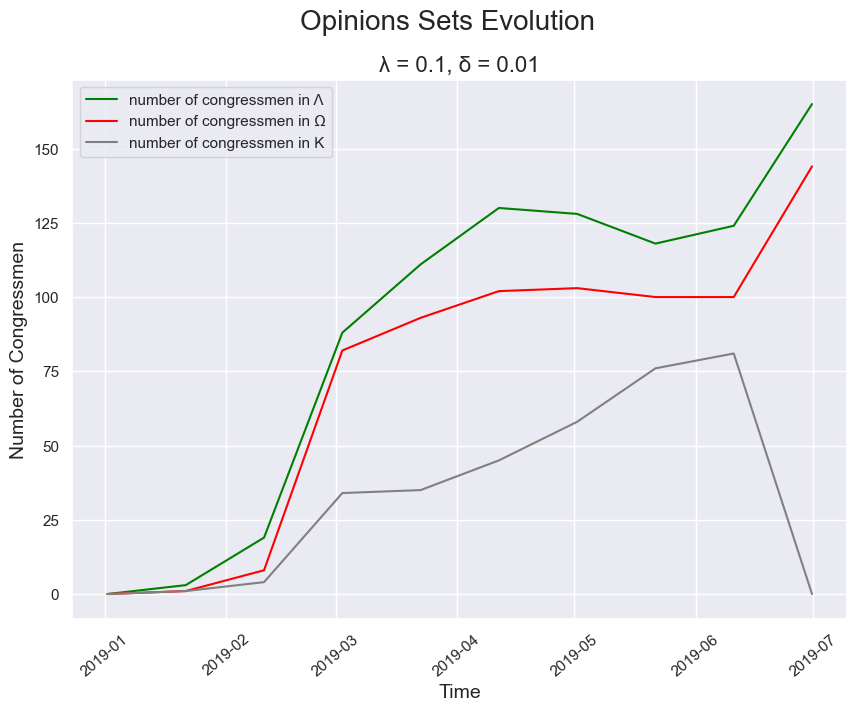

In [41]:
from src.plots import plot_vote_sets_evolution, plot_party_evolution

plot_vote_sets_evolution(opinion_analysis, save = True)


In [42]:
parties_evolution = opinion_analysis.visualize_parties_evolution()

100%|██████████| 10/10 [00:00<00:00, 20.23it/s]


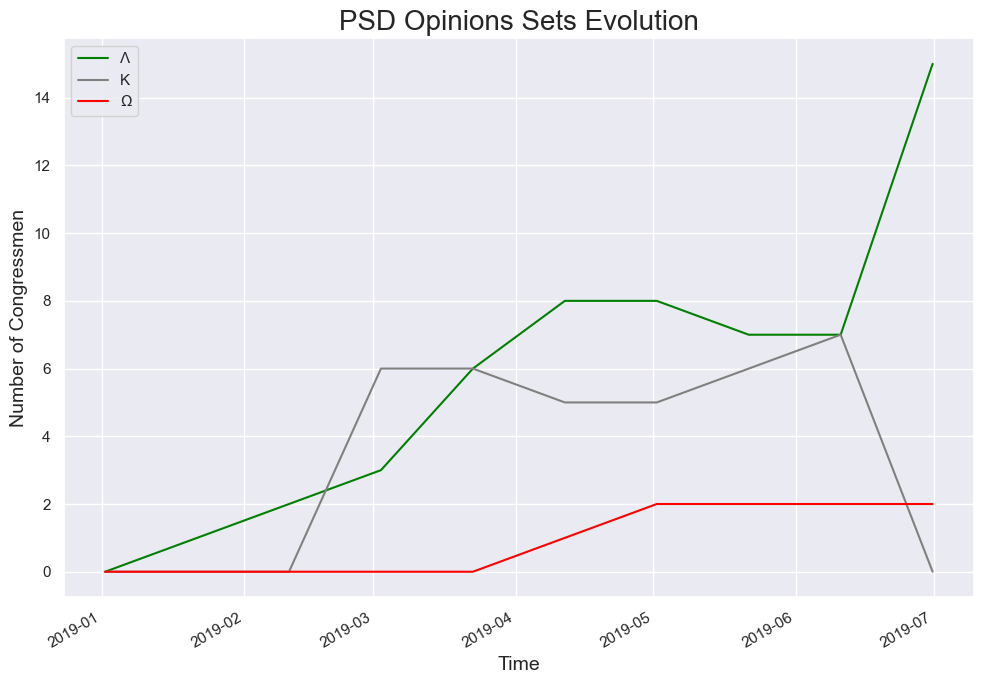

In [44]:
plot_party_evolution(opinion_analysis, party='PSD', save = True)

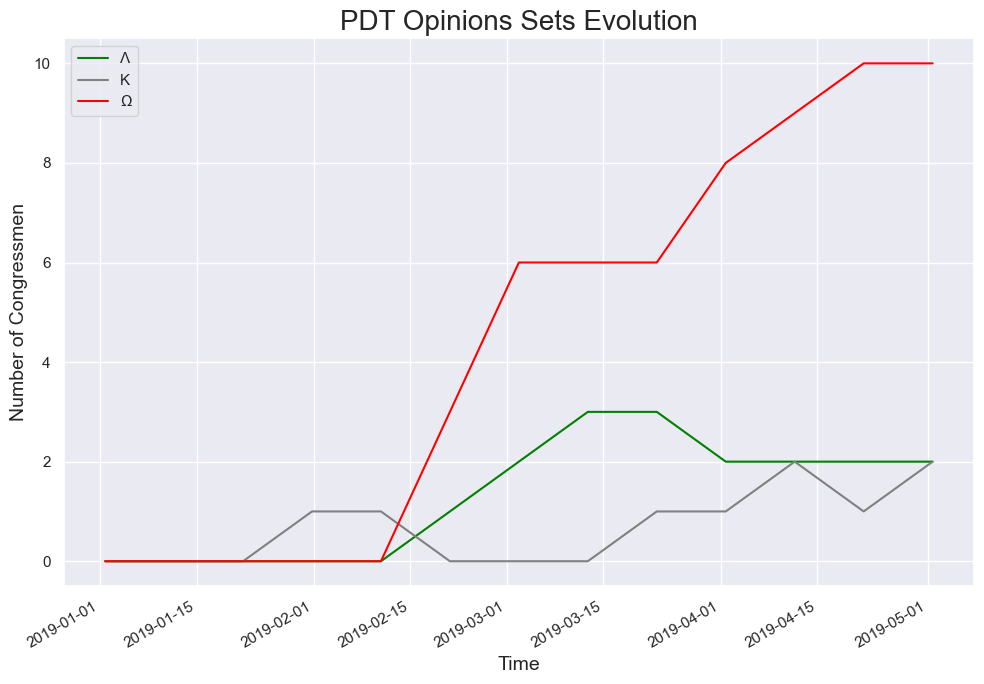

In [39]:
plot_party_evolution(opinion_analysis=opinion_analysis, party='PDT', save = True)

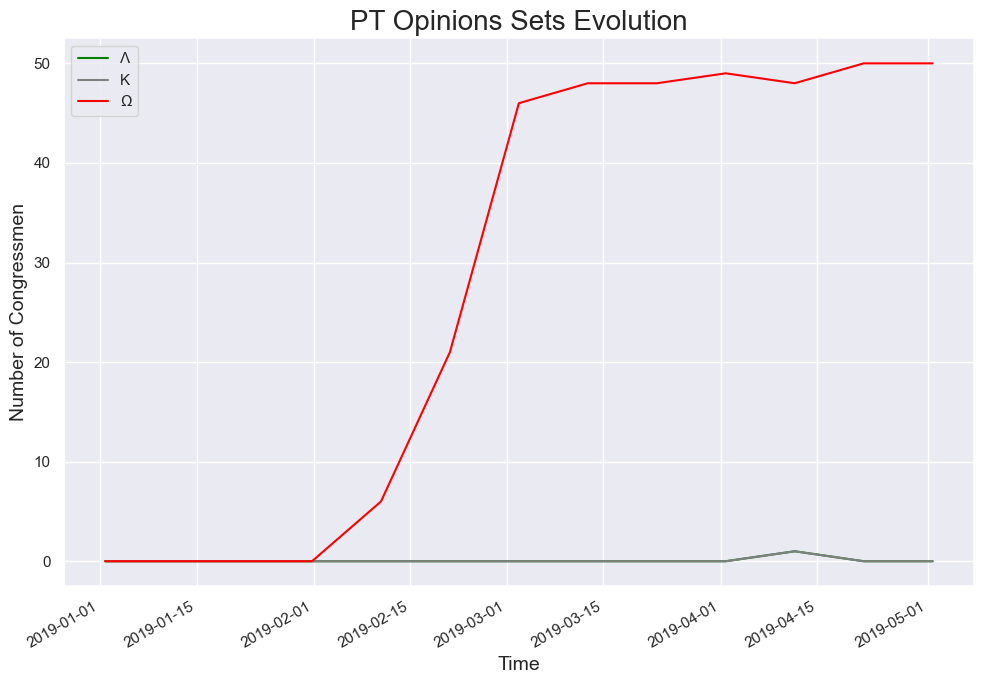

In [40]:
plot_party_evolution(opinion_analysis=opinion_analysis, party='PT', save = True)

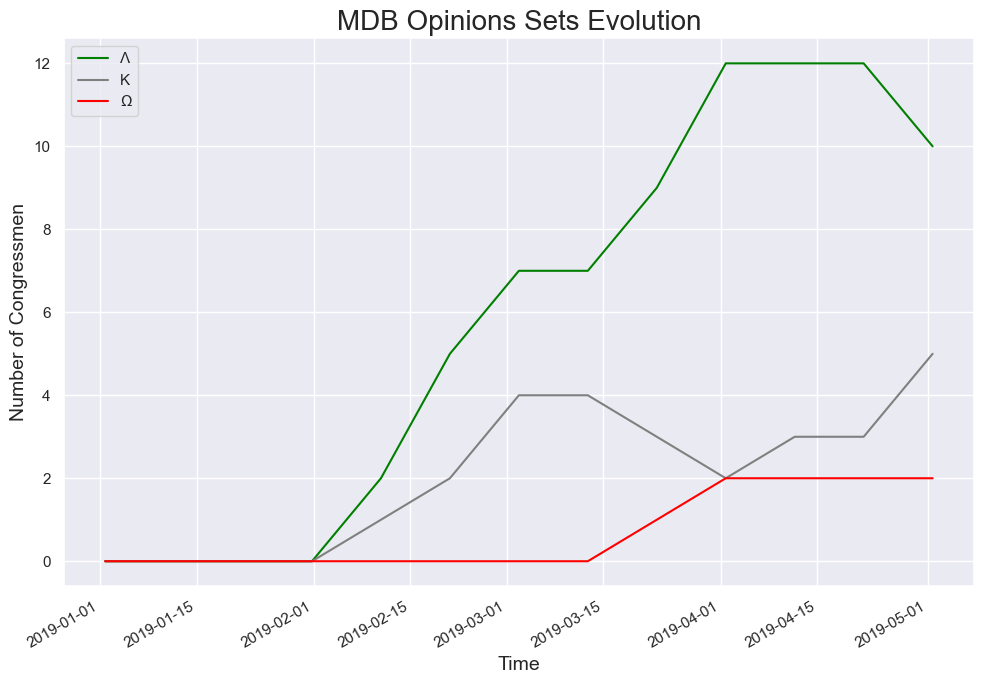

In [41]:
plot_party_evolution(opinion_analysis=opinion_analysis, party='MDB', save = True)

<Axes: title={'center': 'MDB Opinion evolution \n Lag=10'}>

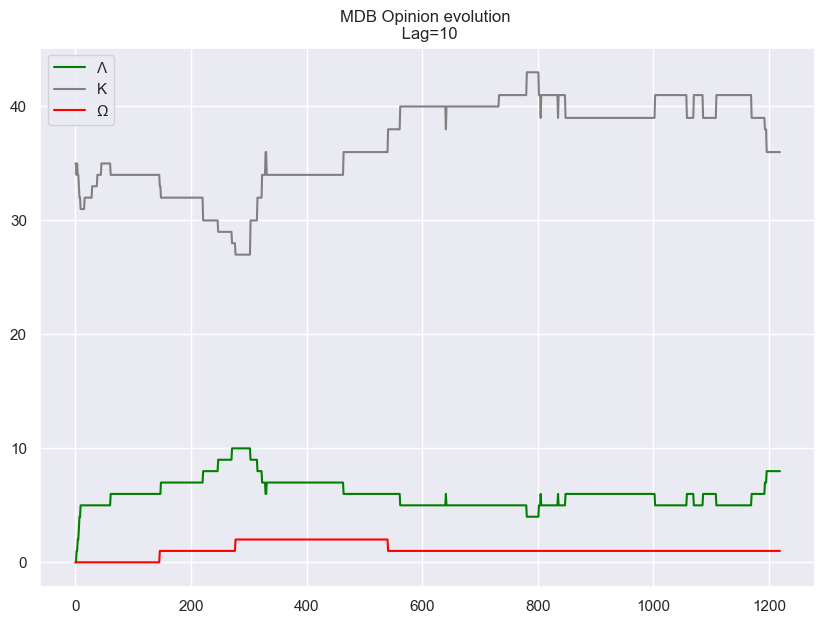

In [ ]:
serie_A, serie_K, serie_O = opinion_analysis.serie_temporal_partido('MDB')
df_mdb = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
df_mdb.columns = ['Λ','K','Ω']
df_mdb.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='MDB Opinion evolution \n Lag=%s'%lag)

<AxesSubplot: title={'center': 'PSL Opinion evolution \n Lag=10'}>

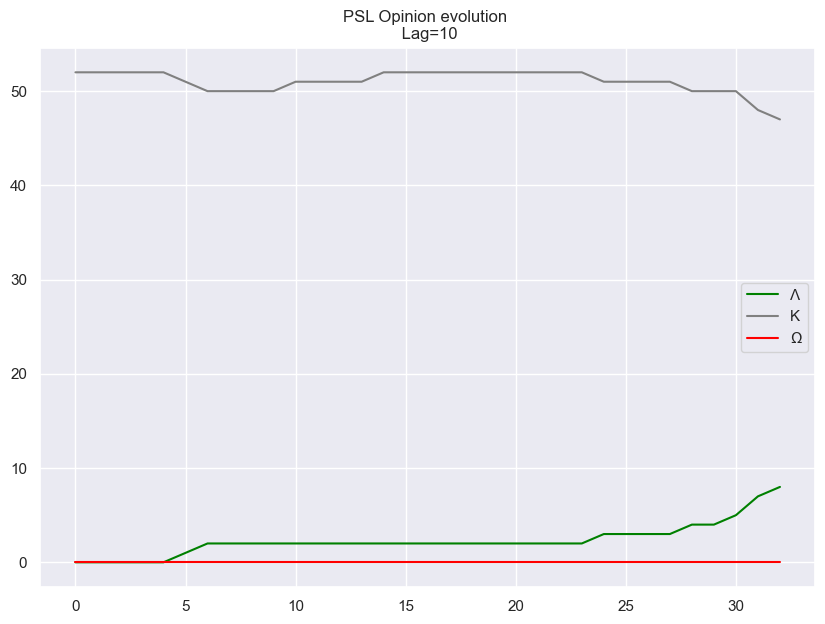

In [ ]:
serie_A, serie_K, serie_O = opinion_analysis.serie_temporal_partido('PSL')
df_psl = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
df_psl.columns = ['Λ','K','Ω']
df_psl.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='PSL Opinion evolution \n Lag=%s'%lag)

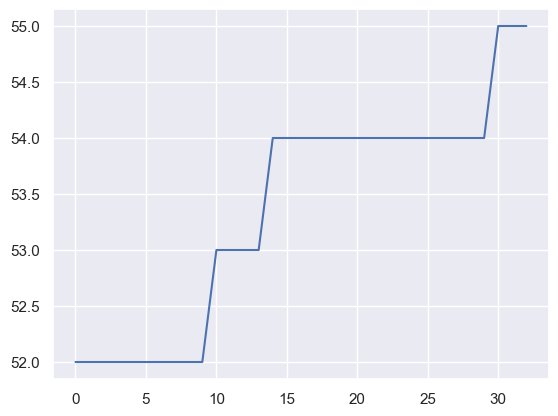

In [ ]:
plt.plot(df_psl.T.sum())

<Axes: title={'center': 'PSL Opinion evolution \n Lag=10'}>

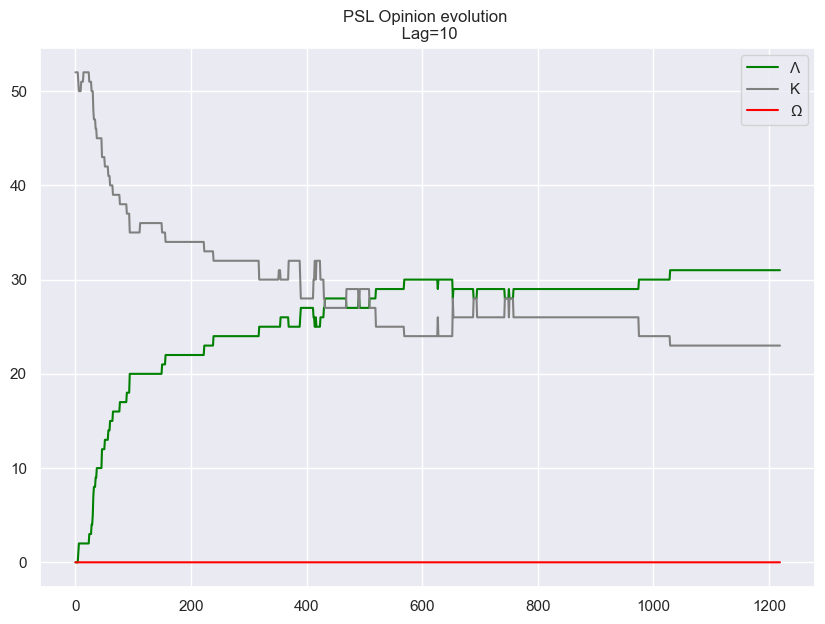

In [ ]:
serie_A, serie_K, serie_O = opinion_analysis.serie_temporal_partido('PSL')
df_psl = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
df_psl.columns = ['Λ','K','Ω']
df_psl.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='PSL Opinion evolution \n Lag=%s'%lag)

In [25]:
np.where(pd.Series([1,2,3])- pd.Series([1,2,3]) != 1)

(array([0, 1, 2]),)

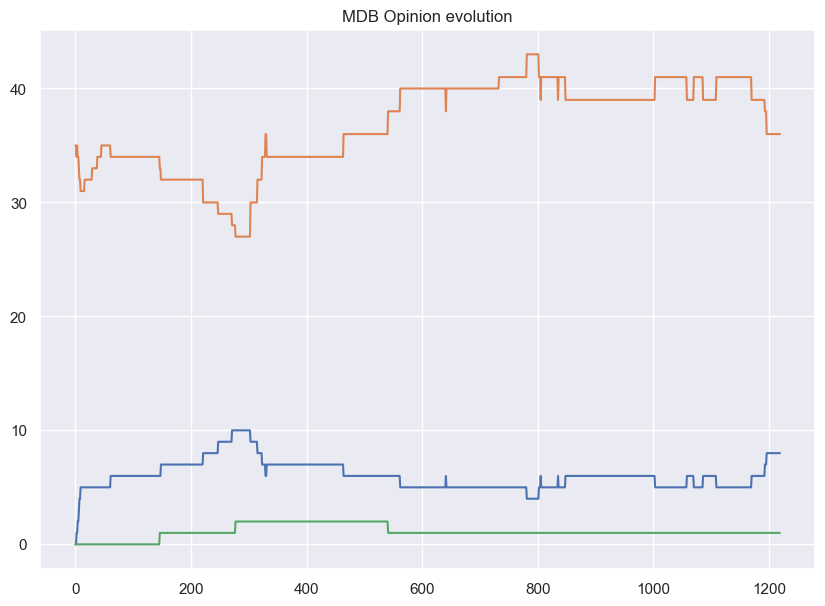

In [16]:
serie_A, serie_K, serie_O = opinion_analysis.serie_temporal_partido('MDB')
plt.figure(figsize=(10,7))
plt.title('MDB Opinion evolution')
plt.plot(serie_A)
plt.plot(serie_K)
plt.plot(serie_O)

In [17]:
opinion_analysis.deputados.Partido.count()

515

In [18]:
parties_evolution[0].keys()

dict_keys(['AVANTE', 'DC', 'DEM', 'MDB', 'NOVO', 'PATRI', 'PC do B', 'PDT', 'PHS', 'PMN', 'PODE', 'PP', 'PPL', 'PPS', 'PR', 'PRB', 'PROS', 'PRP', 'PSB', 'PSC', 'PSD', 'PSDB', 'PSL', 'PSOL', 'PT', 'PTB', 'PTC', 'PV', 'REDE', 'SD'])

In [19]:
parties_evolution[-1]['PC do B']

{1: 0, 0: 1, -1: 8}

In [20]:
tempo=opinion_analysis.time

In [37]:
# plt.figure(figsize=(10,5))
# plt.plot(tempo[1:],lens )
# plt.gcf().autofmt_xdate()
# plt.title('Entrada de novos politicos no debate a partir da data inicial', fontsize=17)
# plt.show()

In [38]:
# plt.figure(figsize=(10,5))
# plt.plot(tempo[1:],lens )
# plt.gcf().autofmt_xdate()
# plt.title('Addition of Elected representatives in the current Twitter debate', fontsize=17)
# plt.show()

<Axes: >

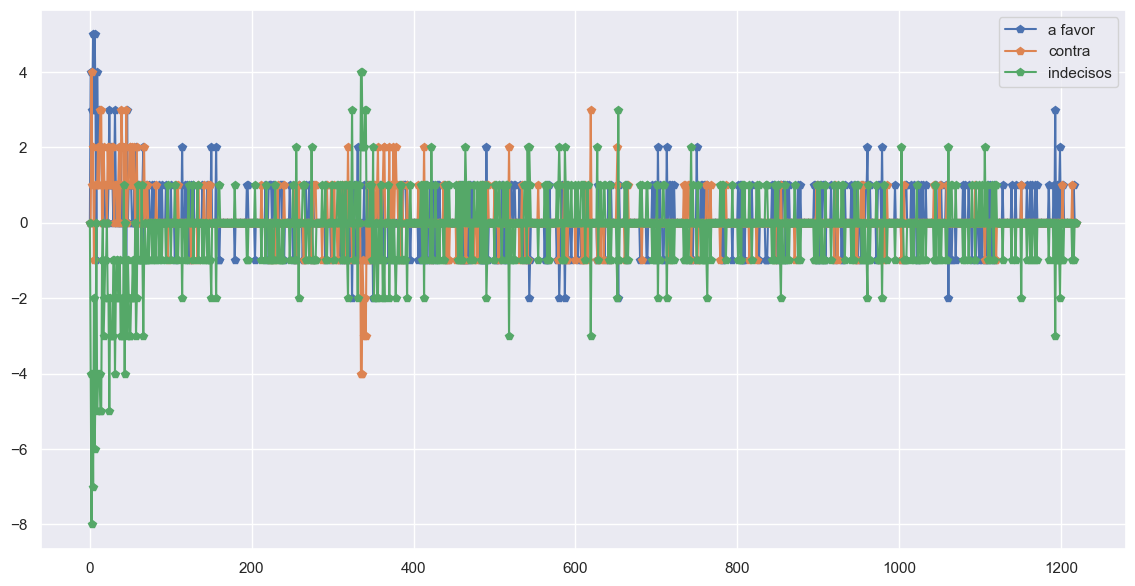

In [23]:
pd.DataFrame(changes,
             columns=['a favor',
                      'contra',
                      'indecisos']).plot(figsize=(14,7),
                                         grid=True,
                                         marker='p')

<Axes: >

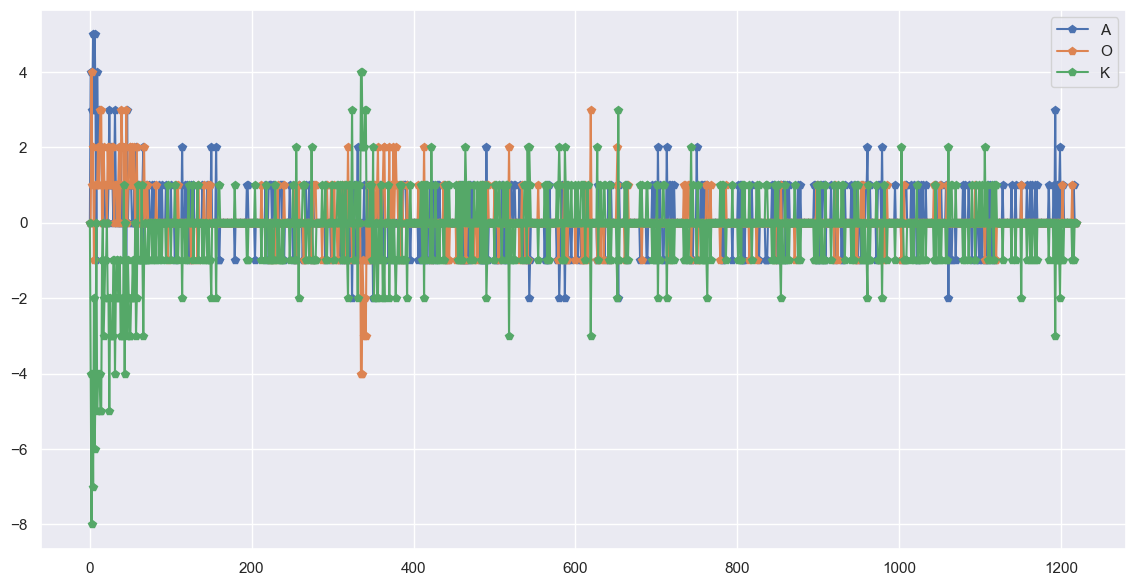

In [24]:
pd.DataFrame(changes,
             columns=['A',
                      'O',
                      'K']).plot(figsize=(14,7),
                                         grid=True,
                                         marker='p')

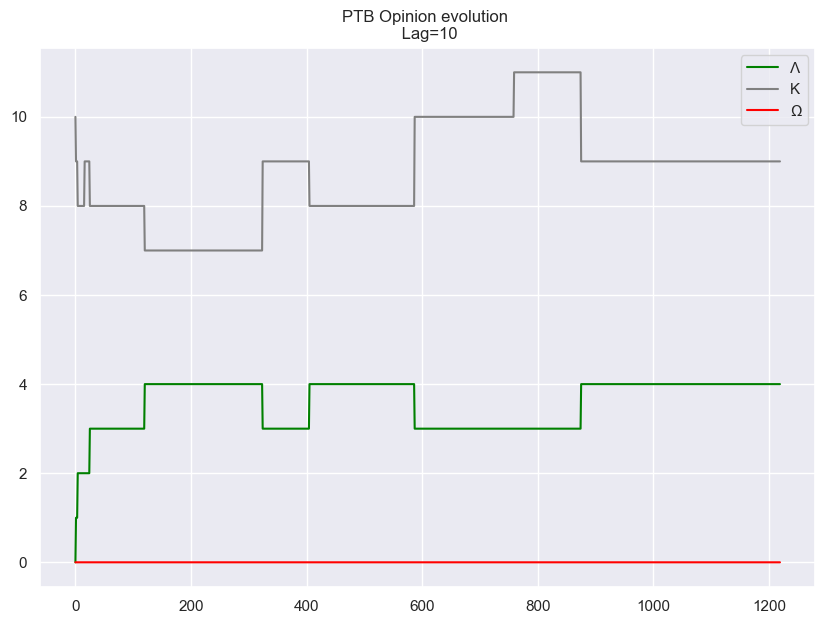

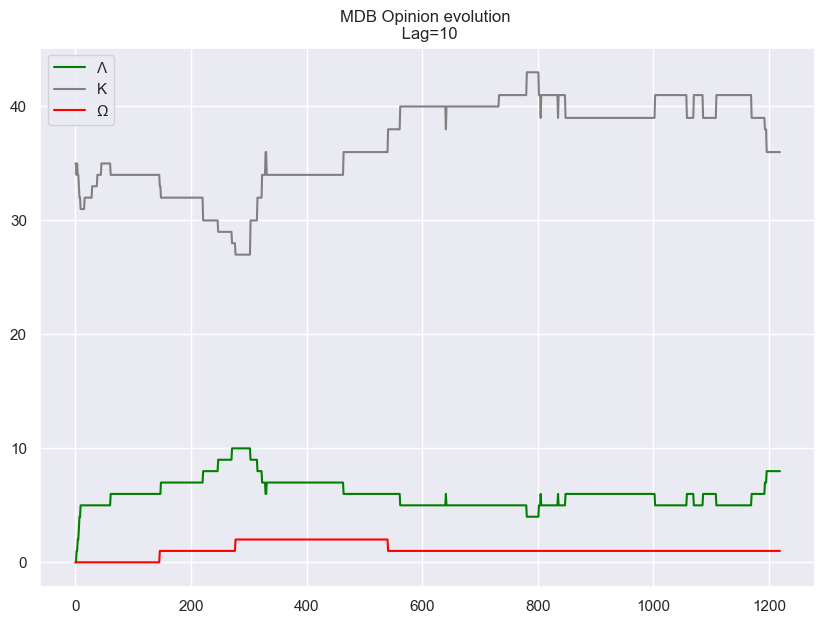

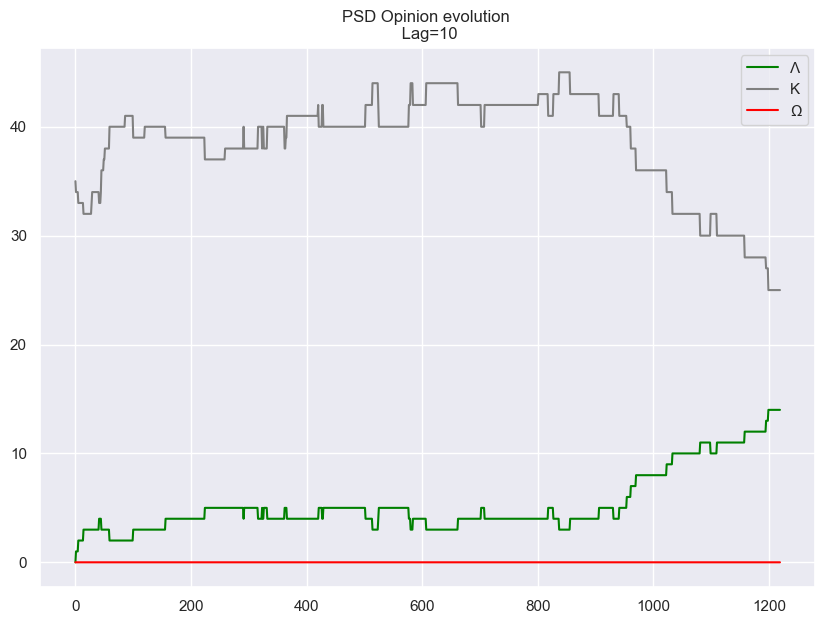

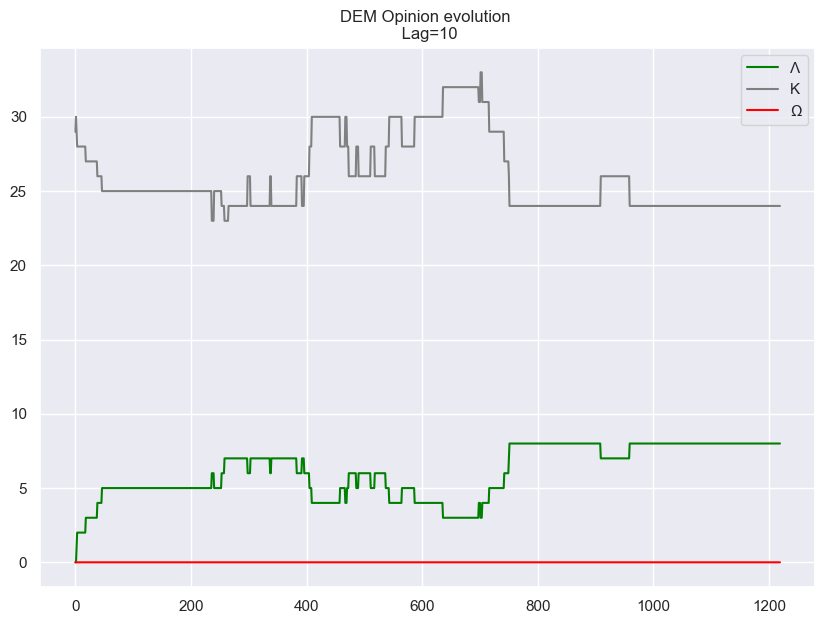

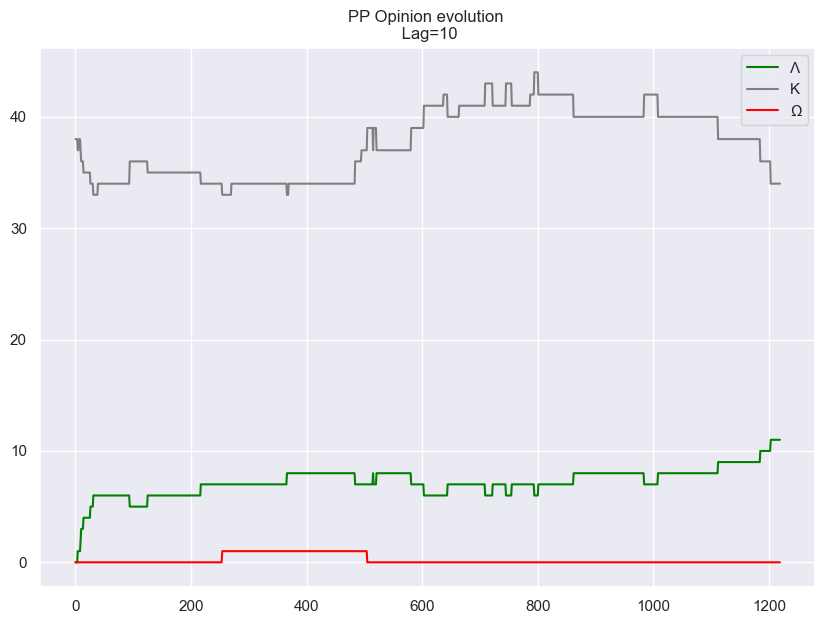

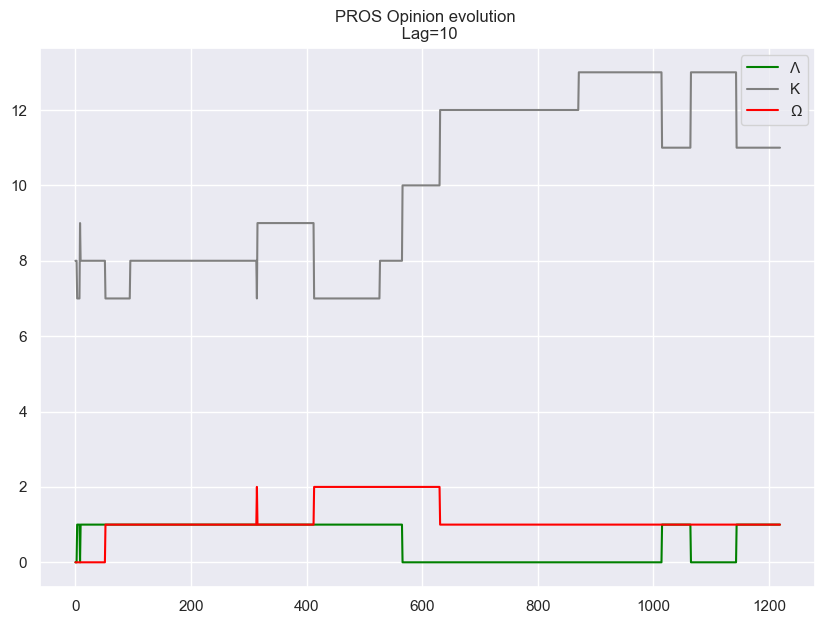

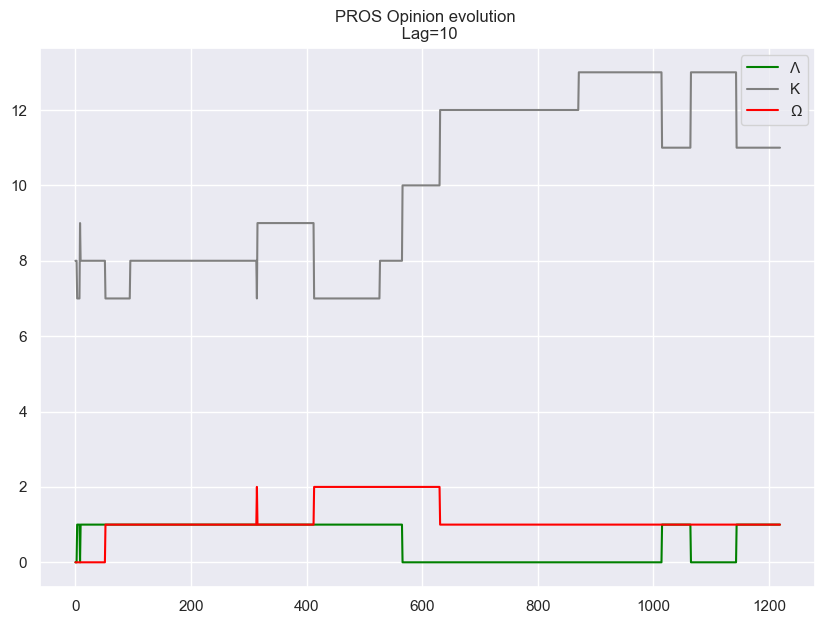

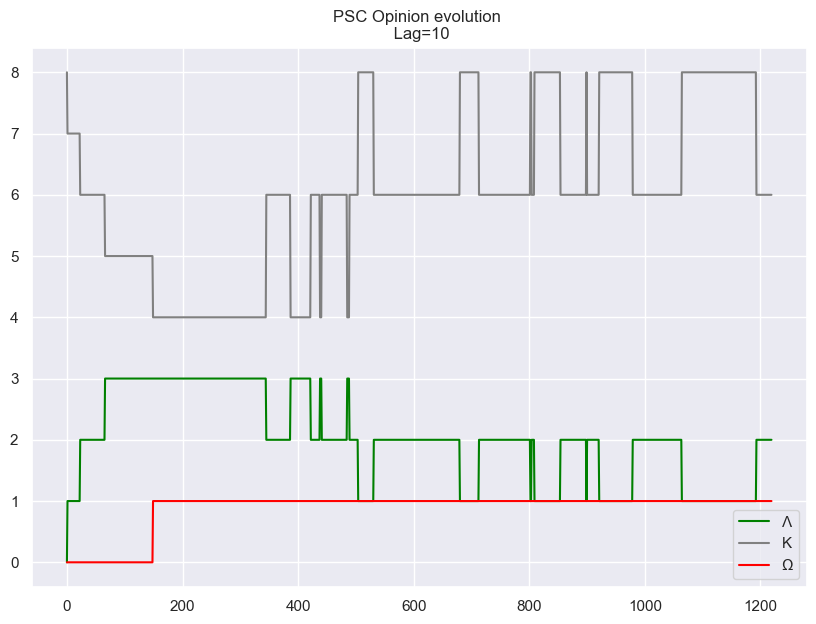

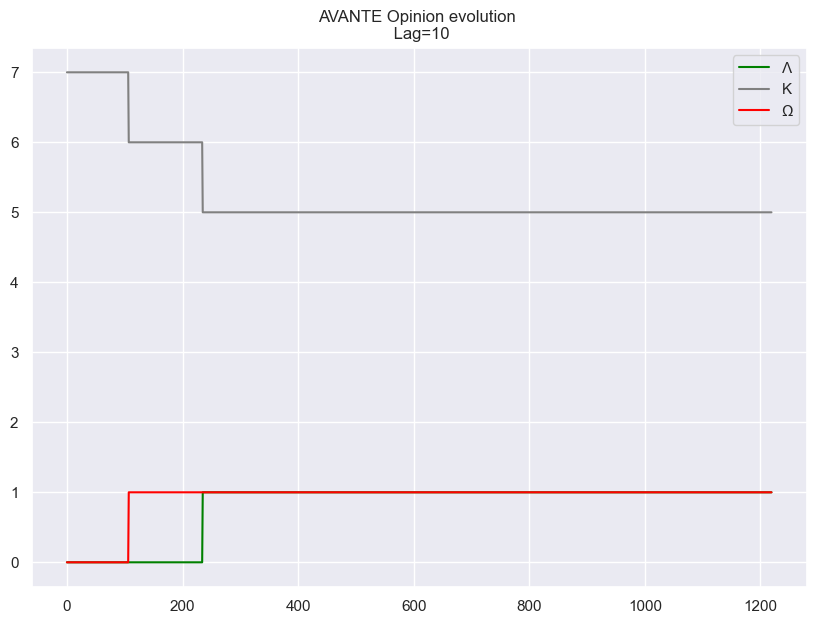

In [25]:
# PARTIDOS CENTRAO
centrao = ['PTB', 'MDB','PSD', 'DEM', 'PP', 'PROS','PROS','PSC', 'AVANTE']
for partido_now in centrao:
    serie_A, serie_K, serie_O = opinion_analysis.serie_temporal_partido(partido_now)
    df_now = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
    df_now.columns = ['Λ','K','Ω']
    df_now.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='%s Opinion evolution \n Lag=%s'%(partido_now,lag))

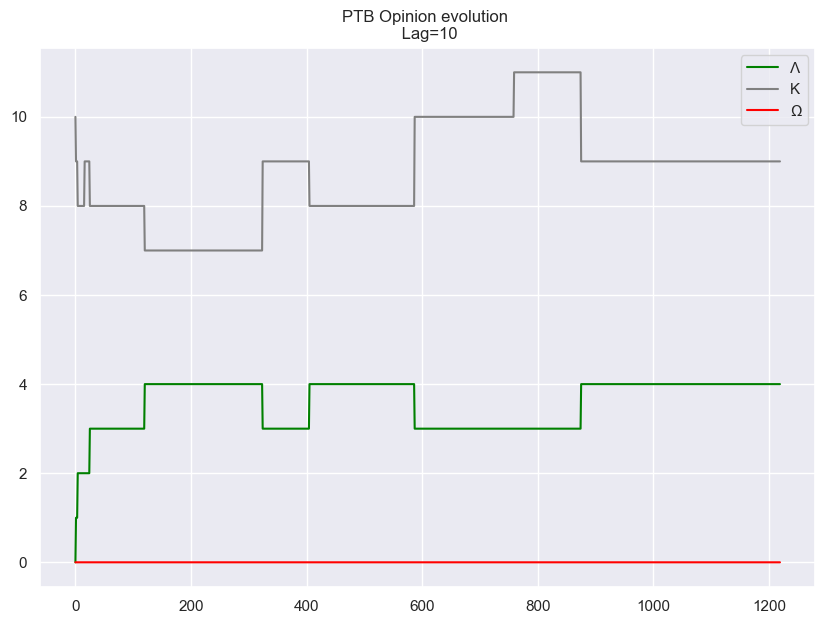

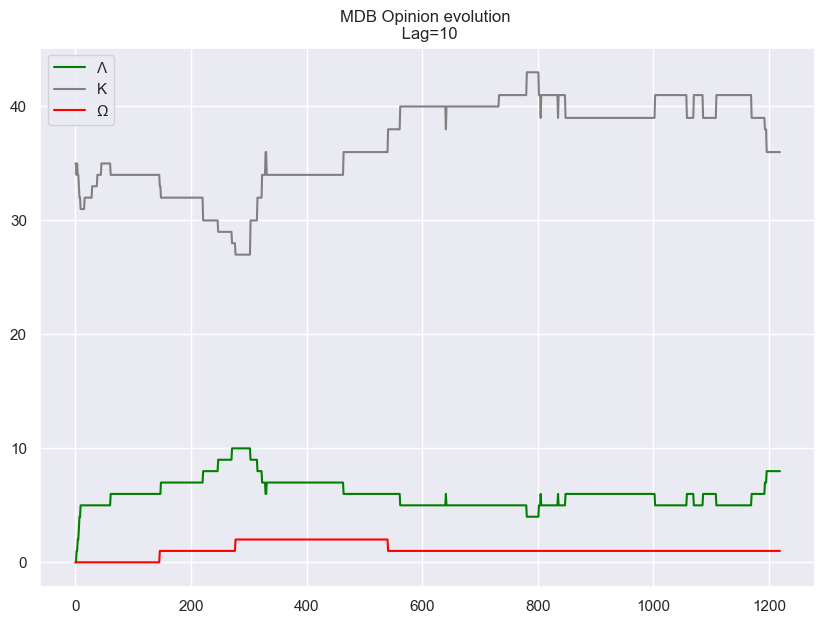

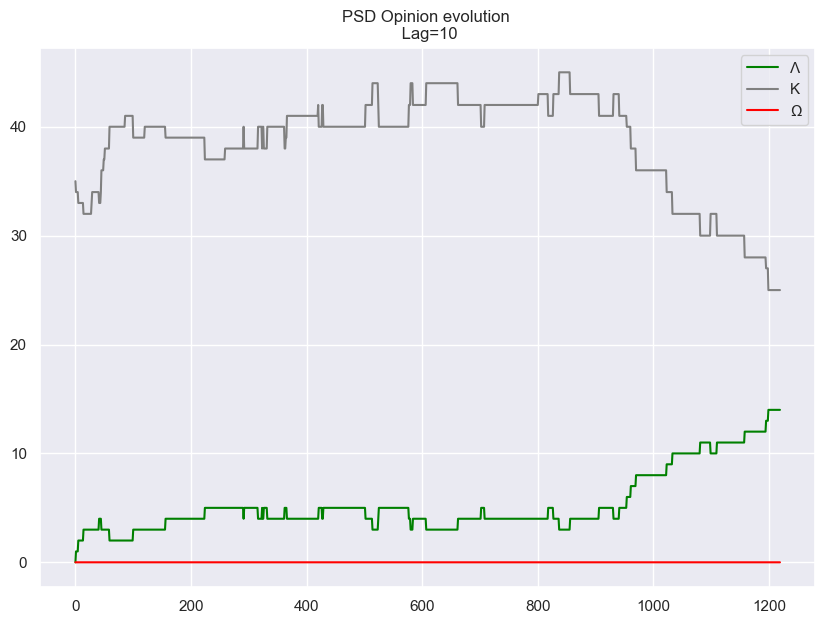

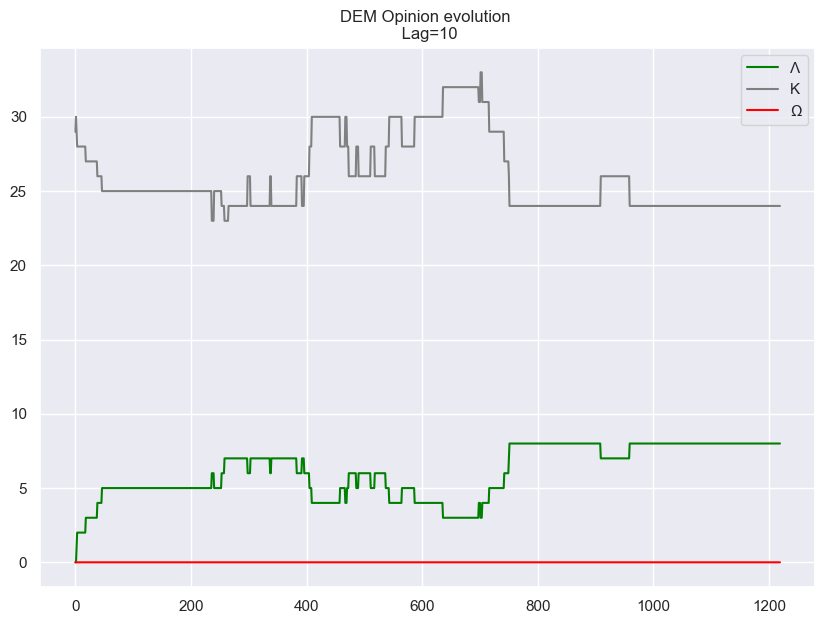

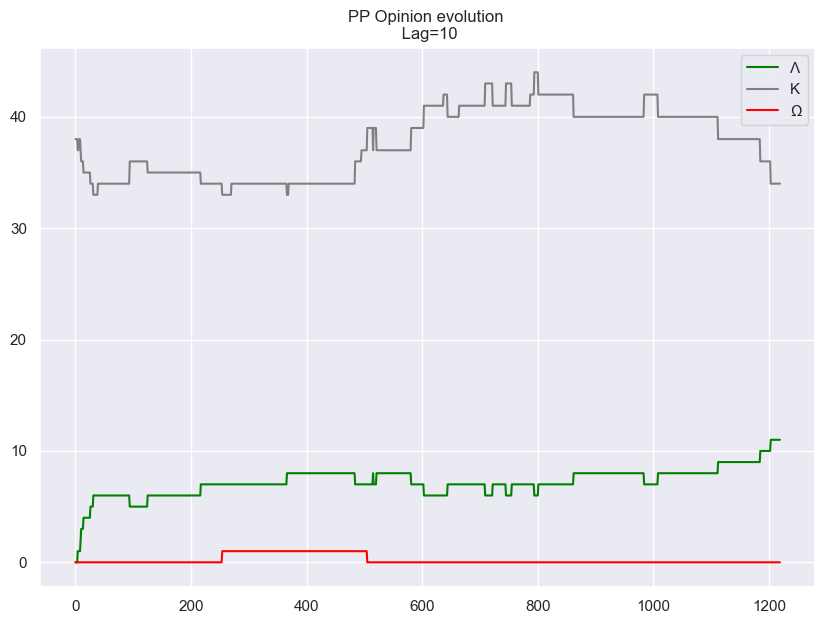

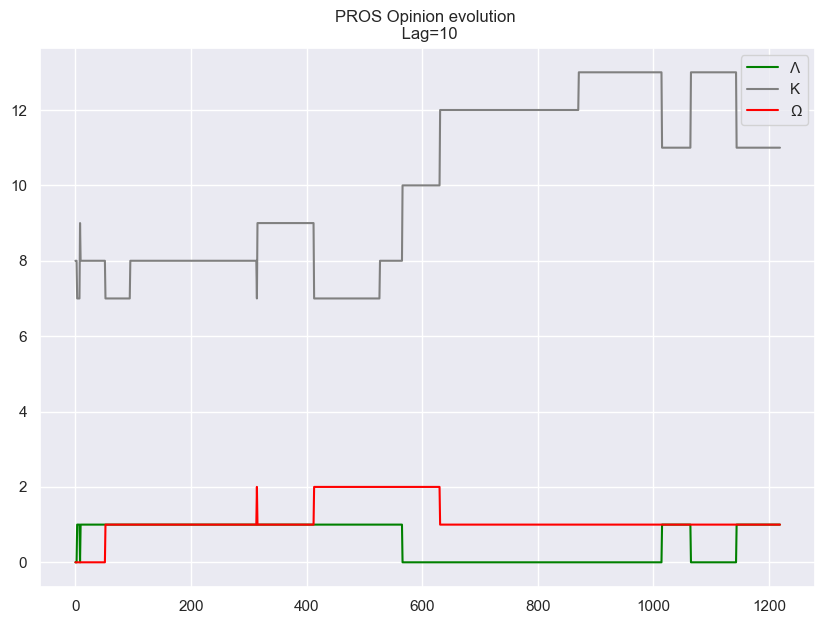

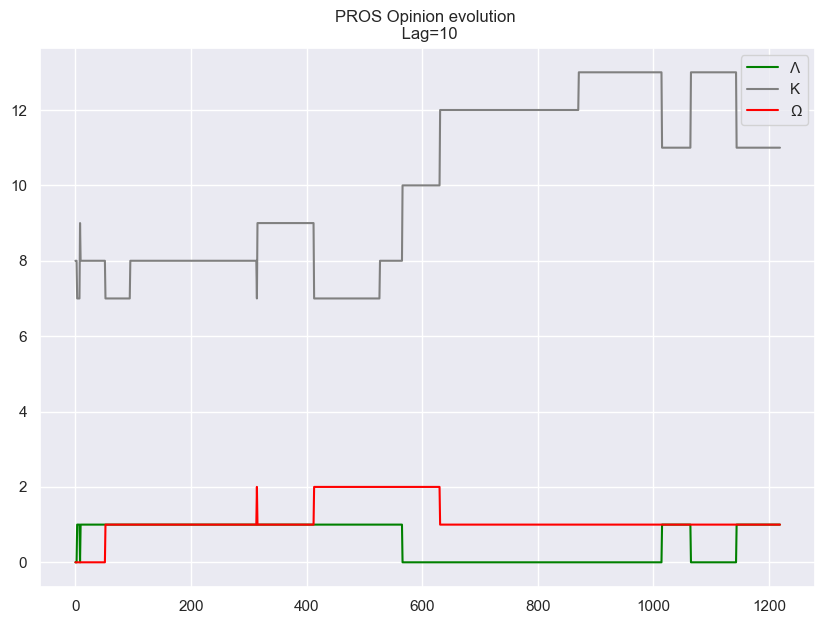

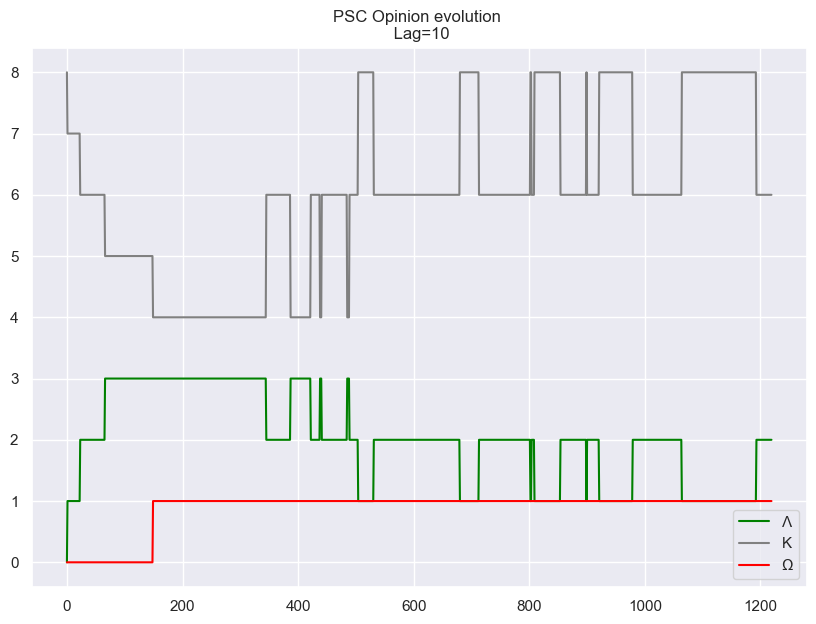

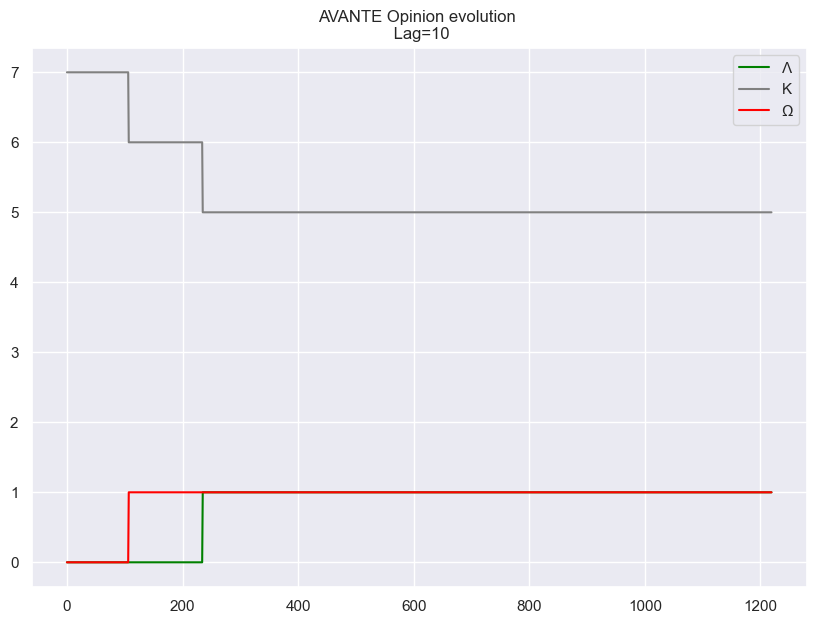

In [26]:
# PARTIDOS CENTRAO
centrao = ['PTB', 'MDB','PSD', 'DEM', 'PP', 'PROS','PROS','PSC', 'AVANTE']
for partido_now in centrao:
    serie_A, serie_K, serie_O = opinion_analysis.serie_temporal_partido(partido_now)
    df_now = pd.concat([pd.DataFrame(x) for x in [serie_A, serie_K, serie_O]],axis=1)
    df_now.columns = ['Λ','K','Ω']
    df_now.plot(figsize=(10,7),color=['green', 'gray', 'red'],title='%s Opinion evolution \n Lag=%s'%(partido_now,lag))

In [ ]:
### FLUXOS
opinion_analysis.get_fluxes_df_interval(lambd,delta,lag)

In [ ]:
rho = {i:opinion_analysis.calculate_single_vote_probability(i) for i in   opinion_analysis.id_politicos[50:60]}